Problem 1

Taylor Series: 
[ 0.00000000e+00  5.87785252e-01  9.51056516e-01  9.51056516e-01
  5.87785252e-01 -5.28918280e-10 -5.87785276e-01 -9.51057125e-01
 -9.51066448e-01 -5.87901575e-01 -1.04818280e-03]


Inverse Weight: 
[-6.35089622e-02  7.12175324e-01  9.79204614e-01  8.64742657e-01
  4.95953203e-01 -3.55271368e-15 -4.95953203e-01 -8.64742657e-01
 -9.79204614e-01 -7.12175324e-01  6.35089622e-02]


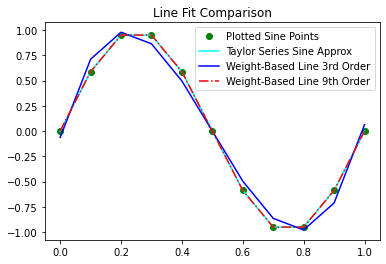

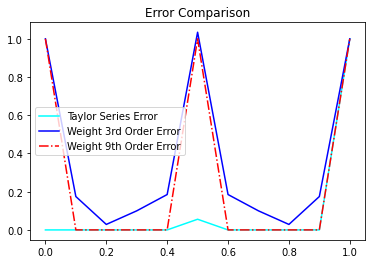


Problem 2:



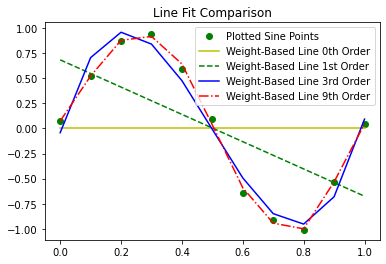

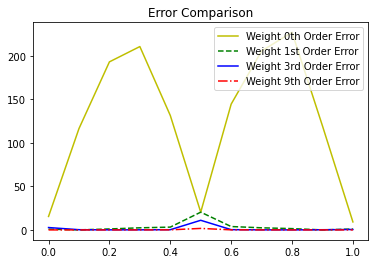

In [236]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Assignment 4, Problem 1, plot the graphs
print("Problem 1\n")
x = np.arange(0,1.1,0.1)
b = np.sin(2*np.pi*x)
plt.figure(0)
plt.plot(x,b,'go', label = "Plotted Sine Points")

# Fitting a third order polynomial line to the sine function
a = np.zeros([11,4])
a[:,0] = 1
a[:,1] = x
a[:,2] = x**2
a[:,3] = x**3
w = np.dot(np.linalg.inv(np.dot(a.T,a)),np.dot(a.T,b))
y = np.dot(a,w)

# Fitting a ninth order polynomial line to the sine function
a9 = np.zeros([11,10])
a9[:,0] = 1
a9[:,1] = x
a9[:,2] = x**2
a9[:,3] = x**3
a9[:,4] = x**4
a9[:,5] = x**5
a9[:,6] = x**6
a9[:,7] = x**7
a9[:,8] = x**8
a9[:,9] = x**9
w9 = np.dot(np.linalg.inv(np.dot(a9.T,a9)),np.dot(a9.T,b))
y9 = np.dot(a9,w9)


# Taylor series values for coefficients of a power series approx.
# f(x) = f(x)(x-c)^0 + f'(x)(x-c) + f''(x)(x-c)^2/2
taylor_series = []

for i in range(10):
    
    negative_component = (-1)**i
    top_component = (x*2*np.pi)**((2*i)+1)
    bottom_component = math.factorial((2*i) + 1)
    #print("top: {}".format(top_component))
    #print("\nbottom: {}\n".format(bottom_component))
    taylor_series.append(negative_component*(top_component/bottom_component))

taylor_series = sum(taylor_series)


# Line Fitting Plot
print("Taylor Series: \n{}\n".format(taylor_series))
plt.plot(x, taylor_series, 'cyan', label = "Taylor Series Sine Approx")

print("\nInverse Weight: \n{}".format(y))
plt.plot(x, y, 'b', label = "Weight-Based Line 3rd Order")
plt.plot(x, y9, 'r-.', label = "Weight-Based Line 9th Order")
plt.title("Line Fit Comparison")
plt.legend()
plt.show()

# Error Plot
plt.figure(1)

t_error = np.abs((b-taylor_series)/(taylor_series+0.00000001))
w_error = np.abs((b - y)/y)
w9_error = np.abs((b - y9)/y9)
plt.title("Error Comparison")
plt.plot(x, t_error, "cyan", label = "Taylor Series Error")
plt.plot(x, w_error, "blue", label = "Weight 3rd Order Error")
plt.plot(x, w9_error, "r-.", label = "Weight 9th Order Error")
plt.legend()

plt.show()






# Problem 2
print("\nProblem 2:\n")
b = np.sin(2*np.pi*x) - 0.1 + 0.2*np.random.rand(1,11)
b = b.T
plt.figure(0)
plt.plot(x,b,'go', label = "Plotted Sine Points")

# Fitting a third order polynomial line to the sine function
a0 = np.zeros([11,1])
a0[:,0] = 1
w0 = np.dot(np.linalg.inv(np.dot(a0.T,a0)),np.dot(a0.T,b))
y0 = np.dot(a0,w0)

# Fitting a ninth order polynomial line to the sine function
a1 = np.zeros([11,2])
a1[:,0] = 1
a1[:,1] = x
w1 = np.dot(np.linalg.inv(np.dot(a1.T,a1)),np.dot(a1.T,b))
y1 = np.dot(a1,w1)

# Fitting a third order polynomial line to the sine function
a = np.zeros([11,4])
a[:,0] = 1
a[:,1] = x
a[:,2] = x**2
a[:,3] = x**3
w = np.dot(np.linalg.inv(np.dot(a.T,a)),np.dot(a.T,b))
y = np.dot(a,w)

# Fitting a ninth order polynomial line to the sine function
a9 = np.zeros([11,10])
a9[:,0] = 1
a9[:,1] = x
a9[:,2] = x**2
a9[:,3] = x**3
a9[:,4] = x**4
a9[:,5] = x**5
a9[:,6] = x**6
a9[:,7] = x**7
a9[:,8] = x**8
a9[:,9] = x**9
w9 = np.dot(np.linalg.inv(np.dot(a9.T,a9)),np.dot(a9.T,b))
y9 = np.dot(a9,w9)

# Line Fitting Plot

plt.figure(0)
plt.plot(x, y0, 'y', label = "Weight-Based Line 0th Order")
plt.plot(x, y1, 'g--', label = "Weight-Based Line 1st Order")
plt.plot(x, y, 'b', label = "Weight-Based Line 3rd Order")
plt.plot(x, y9, 'r-.', label = "Weight-Based Line 9th Order")
plt.title("Line Fit Comparison")
plt.legend()

# Error Plot

plt.figure(1)

w0_error = np.abs((b - y0)/y0)
w1_error = np.abs((b - y1)/y1)
w_error = np.abs((b - y)/y)
w9_error = np.abs((b - y9)/y9)
plt.title("Error Comparison")

plt.plot(x, w0_error, "y", label = "Weight 0th Order Error")
plt.plot(x, w1_error, "g--", label = "Weight 1st Order Error")
plt.plot(x, w_error, "blue", label = "Weight 3rd Order Error")
plt.plot(x, w9_error, "r-.", label = "Weight 9th Order Error")
plt.legend()
plt.show()